# Bank Statement Description Classification

This Jupyter notebook provides a machine learning approach to classify bank statement descriptions into predefined categories. Bank statement descriptions often contain abbreviated or vague information, making it challenging to interpret their meaning. By classifying these descriptions into categories, financial institutions can better analyze transaction data for various purposes such as fraud detection, customer segmentation, and trend analysis.

What we're going to cover:

1. Getting the data ready
2. Choose the right estimator/algorithm for our problems
3. Fit the model/algorithm and use it to make predictions on our data
4. Evaluating a model
5. Improve a model
6. Save and load a trained model


## 1. Getting the data ready

In [1]:
import pandas as pd
import numpy as np

bank_statement = pd.read_csv("./data/bankstatement_seyi.csv")
bank_statement.head()

,DESCRIPTION,TRX_TYPE,CLASS,SUB-CLASS,BANK
0,AKANNI O EMMANUEL/MOB/UTO/ROTIMI EMMANUE/t/184...,Credit,USSD_TRANSFER,NaN,Access Bank
1,TRF/Transfer/FRMROTIMI EMMANUEL AKANNI TO MUHA...,Debit,BANK_TRANSFER,NaN,Access Bank
2,KANU WINNER U/MOBILE/UNION Transfer from KANU ...,Credit,APP_TRANSFER,NaN,Access Bank
3,TRF//FRMROTIMI EMMANUEL AKANNI TO ROTIMI EMMAN...,Credit,APP_TRANSFER,NaN,Access Bank
4,TRF/NULL/FRMUFUOMA BENEDICTA MARCHIE TO ROTIMI...,Credit,APP_TRANSFER,NaN,Access Bank


In [2]:
# Total number of rows in bank statement
len(bank_statement)

4113

In [3]:
bank_statement.dtypes

DESCRIPTION    object
TRX_TYPE       object
CLASS          object
SUB-CLASS      object
BANK           object
dtype: object

### 1a. Drop N/A columns

In [4]:
# Identify Column With N/A values
bank_statement.isna().sum()

DESCRIPTION       2
TRX_TYPE          4
CLASS            13
SUB-CLASS      1183
BANK             10
dtype: int64

In [5]:
bank_statement.dropna(inplace=True)
bank_statement.head()

,DESCRIPTION,TRX_TYPE,CLASS,SUB-CLASS,BANK
5,TRF/REFUND/FRMROTIMI EMMANUEL AKANNI TO KANU W...,Debit,APP_TRANSFER,REFUND,Access Bank
6,TRF/Meat pie/FRMROTIMI EMMANUEL AKANNI TO AKIN...,Debit,APP_TRANSFER,Meat pie,Access Bank
12,TRF/Fuel/FRMUFUOMA BENEDICTA MARCHIE TO ROTIMI...,Credit,APP_TRANSFER,Fuel,Access Bank
15,AIRTIME/ 9MOBILE/08179000904,Debit,UTILITY,Airtime,Access Bank
16,RVSL_AIRTIME/ 9MOBILE/08179000904,Credit,REFUND,Airtime,Access Bank


In [6]:
bank_statement.isna().sum()

DESCRIPTION    0
TRX_TYPE       0
CLASS          0
SUB-CLASS      0
BANK           0
dtype: int64

### 1b.Removing Unnecessary Columns
Remove unwanted columns, keeping only "description" and "class".

In [7]:
streamlined_bank_statement = bank_statement.drop("TRX_TYPE", axis=1)
streamlined_bank_statement.head()

,DESCRIPTION,CLASS,SUB-CLASS,BANK
5,TRF/REFUND/FRMROTIMI EMMANUEL AKANNI TO KANU W...,APP_TRANSFER,REFUND,Access Bank
6,TRF/Meat pie/FRMROTIMI EMMANUEL AKANNI TO AKIN...,APP_TRANSFER,Meat pie,Access Bank
12,TRF/Fuel/FRMUFUOMA BENEDICTA MARCHIE TO ROTIMI...,APP_TRANSFER,Fuel,Access Bank
15,AIRTIME/ 9MOBILE/08179000904,UTILITY,Airtime,Access Bank
16,RVSL_AIRTIME/ 9MOBILE/08179000904,REFUND,Airtime,Access Bank


In [8]:
streamlined_bank_statement = streamlined_bank_statement.drop("SUB-CLASS", axis=1)
streamlined_bank_statement.head()

,DESCRIPTION,CLASS,BANK
5,TRF/REFUND/FRMROTIMI EMMANUEL AKANNI TO KANU W...,APP_TRANSFER,Access Bank
6,TRF/Meat pie/FRMROTIMI EMMANUEL AKANNI TO AKIN...,APP_TRANSFER,Access Bank
12,TRF/Fuel/FRMUFUOMA BENEDICTA MARCHIE TO ROTIMI...,APP_TRANSFER,Access Bank
15,AIRTIME/ 9MOBILE/08179000904,UTILITY,Access Bank
16,RVSL_AIRTIME/ 9MOBILE/08179000904,REFUND,Access Bank


In [9]:
streamlined_bank_statement = streamlined_bank_statement.drop("BANK", axis=1)
streamlined_bank_statement.head()

,DESCRIPTION,CLASS
5,TRF/REFUND/FRMROTIMI EMMANUEL AKANNI TO KANU W...,APP_TRANSFER
6,TRF/Meat pie/FRMROTIMI EMMANUEL AKANNI TO AKIN...,APP_TRANSFER
12,TRF/Fuel/FRMUFUOMA BENEDICTA MARCHIE TO ROTIMI...,APP_TRANSFER
15,AIRTIME/ 9MOBILE/08179000904,UTILITY
16,RVSL_AIRTIME/ 9MOBILE/08179000904,REFUND


In [10]:
# Check Number of Rows
len(streamlined_bank_statement)


2916

In [11]:
streamlined_bank_statement.isna().sum()

DESCRIPTION    0
CLASS          0
dtype: int64

### 1c. Rename Columns

In [12]:
streamlined_bank_statement['txn_description'] = streamlined_bank_statement['DESCRIPTION']
streamlined_bank_statement.head()

,DESCRIPTION,CLASS,txn_description
5,TRF/REFUND/FRMROTIMI EMMANUEL AKANNI TO KANU W...,APP_TRANSFER,TRF/REFUND/FRMROTIMI EMMANUEL AKANNI TO KANU W...
6,TRF/Meat pie/FRMROTIMI EMMANUEL AKANNI TO AKIN...,APP_TRANSFER,TRF/Meat pie/FRMROTIMI EMMANUEL AKANNI TO AKIN...
12,TRF/Fuel/FRMUFUOMA BENEDICTA MARCHIE TO ROTIMI...,APP_TRANSFER,TRF/Fuel/FRMUFUOMA BENEDICTA MARCHIE TO ROTIMI...
15,AIRTIME/ 9MOBILE/08179000904,UTILITY,AIRTIME/ 9MOBILE/08179000904
16,RVSL_AIRTIME/ 9MOBILE/08179000904,REFUND,RVSL_AIRTIME/ 9MOBILE/08179000904


In [13]:
streamlined_bank_statement['target'] = streamlined_bank_statement['CLASS']
streamlined_bank_statement.head()

,DESCRIPTION,CLASS,txn_description,target
5,TRF/REFUND/FRMROTIMI EMMANUEL AKANNI TO KANU W...,APP_TRANSFER,TRF/REFUND/FRMROTIMI EMMANUEL AKANNI TO KANU W...,APP_TRANSFER
6,TRF/Meat pie/FRMROTIMI EMMANUEL AKANNI TO AKIN...,APP_TRANSFER,TRF/Meat pie/FRMROTIMI EMMANUEL AKANNI TO AKIN...,APP_TRANSFER
12,TRF/Fuel/FRMUFUOMA BENEDICTA MARCHIE TO ROTIMI...,APP_TRANSFER,TRF/Fuel/FRMUFUOMA BENEDICTA MARCHIE TO ROTIMI...,APP_TRANSFER
15,AIRTIME/ 9MOBILE/08179000904,UTILITY,AIRTIME/ 9MOBILE/08179000904,UTILITY
16,RVSL_AIRTIME/ 9MOBILE/08179000904,REFUND,RVSL_AIRTIME/ 9MOBILE/08179000904,REFUND


In [14]:
streamlined_bank_statement = streamlined_bank_statement.drop("DESCRIPTION", axis=1)
streamlined_bank_statement.head()

,CLASS,txn_description,target
5,APP_TRANSFER,TRF/REFUND/FRMROTIMI EMMANUEL AKANNI TO KANU W...,APP_TRANSFER
6,APP_TRANSFER,TRF/Meat pie/FRMROTIMI EMMANUEL AKANNI TO AKIN...,APP_TRANSFER
12,APP_TRANSFER,TRF/Fuel/FRMUFUOMA BENEDICTA MARCHIE TO ROTIMI...,APP_TRANSFER
15,UTILITY,AIRTIME/ 9MOBILE/08179000904,UTILITY
16,REFUND,RVSL_AIRTIME/ 9MOBILE/08179000904,REFUND


In [15]:
streamlined_bank_statement = streamlined_bank_statement.drop("CLASS", axis=1)
streamlined_bank_statement.head()

,txn_description,target
5,TRF/REFUND/FRMROTIMI EMMANUEL AKANNI TO KANU W...,APP_TRANSFER
6,TRF/Meat pie/FRMROTIMI EMMANUEL AKANNI TO AKIN...,APP_TRANSFER
12,TRF/Fuel/FRMUFUOMA BENEDICTA MARCHIE TO ROTIMI...,APP_TRANSFER
15,AIRTIME/ 9MOBILE/08179000904,UTILITY
16,RVSL_AIRTIME/ 9MOBILE/08179000904,REFUND


In [16]:
# Save Refined data as csv
streamlined_bank_statement.to_csv("./data/streamlined_bank_statement.csv", index=False)

### 1c. Convert target object to Int

In [17]:
LABELS = {
    'AGENT_WITHDRAWAL': 0,
    'APP_TRANSFER': 1,
    'ATM': 2,
    'BANK TRANSFER': 3,
    'BANK_CHARGES': 4,
    'CASH_WITHDRAWAL': 6,
    'Class': 7,
    'DEBIT': 8,
    'LOAN': 9,
    'ONLINE_TRANSFER': 10,
    'POS': 11,
    'REFUND': 12,
    'SALARY': 13,
    'TAX': 14,
    'USSD_TRANSFER': 15,
    'UTILITY': 16
}

In [18]:
streamlined_bank_statement.isna().sum()

txn_description    0
target             0
dtype: int64

In [19]:
streamlined_bank_statement['target'] = streamlined_bank_statement['target'].map(LABELS)
streamlined_bank_statement.head()

,txn_description,target
5,TRF/REFUND/FRMROTIMI EMMANUEL AKANNI TO KANU W...,1.0
6,TRF/Meat pie/FRMROTIMI EMMANUEL AKANNI TO AKIN...,1.0
12,TRF/Fuel/FRMUFUOMA BENEDICTA MARCHIE TO ROTIMI...,1.0
15,AIRTIME/ 9MOBILE/08179000904,16.0
16,RVSL_AIRTIME/ 9MOBILE/08179000904,12.0


In [20]:
streamlined_bank_statement.isna().sum()

txn_description      0
target             242
dtype: int64

In [21]:
streamlined_bank_statement.dropna(inplace=True)

In [22]:
streamlined_bank_statement.isna().sum()

txn_description    0
target             0
dtype: int64

In [23]:
len(streamlined_bank_statement)

2674

### 1c. Shuffle Data

In [24]:
streamlined_bank_statement = streamlined_bank_statement.sample(frac=1, random_state=42)

### 1d. Split Data into X/y

In [25]:
X = streamlined_bank_statement.drop("target", axis=1)
y = streamlined_bank_statement["target"]

### 1e. Convert txn_description object to Int using TF-IDF vectorizer

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit(X['txn_description'])
transformed_X = tfidf_vectorizer.transform(X['txn_description'])
transformed_X



<2674x4143 sparse matrix of type '<class 'numpy.float64'>'
	with 30185 stored elements in Compressed Sparse Row format>

### 1f. Check how many rows we now have

In [27]:
len(y), len(X)

(2674, 2674)

### 1g. Check for N/A

In [28]:
y.isna().sum()

0

In [29]:
X.isna().sum()

txn_description    0
dtype: int64

## 2. choosing the right estimator/algorithm for your problem
Using:https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html as a roadmap to picking a model, Our options are:
- Linear SVC
- KNeighbors Classifier
- Ensemble Classifier


## 3. Fit the model/algorithm and use it to make predictions on our data

##### 3a. In this step, we split the data into training and testing sets, allocating 80% for training and 20% for testing.

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)

#### 3a. Linear SVC

In [31]:
from sklearn.svm import LinearSVC

#set up random seed
np.random.seed(42)
linear_svc_clf = LinearSVC(max_iter=10000, dual='auto')
linear_svc_clf.fit(X_train, y_train)

# Evaluate LinearSVC
linear_svc_clf.score(X_test, y_test)

0.9887850467289719

In [32]:
np.random.seed(42)
highest_score = 0
optimal_max_iter = 0
for i in range(10, 100, 1):
    print(f"Trying LinearSVC with {i} max_iter")
    linear_svc_clf = LinearSVC(max_iter=i, dual='auto')
    linear_svc_clf.fit(X_train, y_train)
    score = linear_svc_clf.score(X_test, y_test)
    print(f" Model accuracy on test set: {score*100:.2f}%")
    
    if score > highest_score:
        highest_score = score
        optimal_max_iter = i
    
    print("")
    
print("highest score is:", highest_score, " at optimal_max_iter:", optimal_max_iter)
    

Trying LinearSVC with 10 max_iter
 Model accuracy on test set: 98.88%

Trying LinearSVC with 11 max_iter
 Model accuracy on test set: 98.88%

Trying LinearSVC with 12 max_iter
 Model accuracy on test set: 98.88%

Trying LinearSVC with 13 max_iter
 Model accuracy on test set: 98.88%

Trying LinearSVC with 14 max_iter
 Model accuracy on test set: 98.88%

Trying LinearSVC with 15 max_iter
 Model accuracy on test set: 98.88%

Trying LinearSVC with 16 max_iter
 Model accuracy on test set: 98.88%

Trying LinearSVC with 17 max_iter
 Model accuracy on test set: 98.88%

Trying LinearSVC with 18 max_iter
 Model accuracy on test set: 98.88%

Trying LinearSVC with 19 max_iter
 Model accuracy on test set: 98.88%

Trying LinearSVC with 20 max_iter
 Model accuracy on test set: 98.88%

Trying LinearSVC with 21 max_iter
 Model accuracy on test set: 98.88%

Trying LinearSVC with 22 max_iter
 Model accuracy on test set: 98.88%

Trying LinearSVC with 23 max_iter
 Model accuracy on test set: 98.88%

Trying

/Users/oluwatomisinjames/Ml-course/sample-project2/env/lib/python3.12/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/oluwatomisinjames/Ml-course/sample-project2/env/lib/python3.12/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/oluwatomisinjames/Ml-course/sample-project2/env/lib/python3.12/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/oluwatomisinjames/Ml-course/sample-project2/env/lib/python3.12/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/oluwatomisinjames/Ml-course/sample-project2/env/lib/python3.12/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed 

 Model accuracy on test set: 98.88%

Trying LinearSVC with 30 max_iter
 Model accuracy on test set: 98.88%

Trying LinearSVC with 31 max_iter
 Model accuracy on test set: 98.88%

Trying LinearSVC with 32 max_iter
 Model accuracy on test set: 98.88%

Trying LinearSVC with 33 max_iter
 Model accuracy on test set: 98.88%

Trying LinearSVC with 34 max_iter
 Model accuracy on test set: 98.88%

Trying LinearSVC with 35 max_iter
 Model accuracy on test set: 98.88%

Trying LinearSVC with 36 max_iter
 Model accuracy on test set: 98.88%

Trying LinearSVC with 37 max_iter
 Model accuracy on test set: 98.88%

Trying LinearSVC with 38 max_iter
 Model accuracy on test set: 98.88%

Trying LinearSVC with 39 max_iter
 Model accuracy on test set: 98.88%

Trying LinearSVC with 40 max_iter
 Model accuracy on test set: 98.88%

Trying LinearSVC with 41 max_iter
 Model accuracy on test set: 98.88%

Trying LinearSVC with 42 max_iter
 Model accuracy on test set: 98.88%

Trying LinearSVC with 43 max_iter
 Model

/Users/oluwatomisinjames/Ml-course/sample-project2/env/lib/python3.12/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/oluwatomisinjames/Ml-course/sample-project2/env/lib/python3.12/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/oluwatomisinjames/Ml-course/sample-project2/env/lib/python3.12/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/oluwatomisinjames/Ml-course/sample-project2/env/lib/python3.12/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/oluwatomisinjames/Ml-course/sample-project2/env/lib/python3.12/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed 

 Model accuracy on test set: 98.88%

Trying LinearSVC with 45 max_iter
 Model accuracy on test set: 98.88%

Trying LinearSVC with 46 max_iter
 Model accuracy on test set: 98.88%

Trying LinearSVC with 47 max_iter
 Model accuracy on test set: 98.88%

Trying LinearSVC with 48 max_iter
 Model accuracy on test set: 98.88%

Trying LinearSVC with 49 max_iter
 Model accuracy on test set: 98.88%

Trying LinearSVC with 50 max_iter
 Model accuracy on test set: 98.88%

Trying LinearSVC with 51 max_iter
 Model accuracy on test set: 98.88%

Trying LinearSVC with 52 max_iter
 Model accuracy on test set: 98.88%

Trying LinearSVC with 53 max_iter
 Model accuracy on test set: 98.88%

Trying LinearSVC with 54 max_iter
 Model accuracy on test set: 98.88%

Trying LinearSVC with 55 max_iter
 Model accuracy on test set: 98.88%

Trying LinearSVC with 56 max_iter
 Model accuracy on test set: 98.88%

Trying LinearSVC with 57 max_iter
 Model accuracy on test set: 98.88%

Trying LinearSVC with 58 max_iter
 Model

/Users/oluwatomisinjames/Ml-course/sample-project2/env/lib/python3.12/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/oluwatomisinjames/Ml-course/sample-project2/env/lib/python3.12/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


 Model accuracy on test set: 98.88%

Trying LinearSVC with 60 max_iter
 Model accuracy on test set: 98.88%

Trying LinearSVC with 61 max_iter
 Model accuracy on test set: 98.88%

Trying LinearSVC with 62 max_iter
 Model accuracy on test set: 98.88%

Trying LinearSVC with 63 max_iter
 Model accuracy on test set: 98.88%

Trying LinearSVC with 64 max_iter
 Model accuracy on test set: 98.88%

Trying LinearSVC with 65 max_iter
 Model accuracy on test set: 98.88%

Trying LinearSVC with 66 max_iter
 Model accuracy on test set: 98.88%

Trying LinearSVC with 67 max_iter
 Model accuracy on test set: 98.88%

Trying LinearSVC with 68 max_iter
 Model accuracy on test set: 98.88%

Trying LinearSVC with 69 max_iter
 Model accuracy on test set: 98.88%

Trying LinearSVC with 70 max_iter
 Model accuracy on test set: 98.88%

Trying LinearSVC with 71 max_iter
 Model accuracy on test set: 98.88%

Trying LinearSVC with 72 max_iter
 Model accuracy on test set: 98.88%

Trying LinearSVC with 73 max_iter
 Model

In [64]:
#set up random seed
import warnings
warnings.filterwarnings('ignore')
np.random.seed(42)
final_linear_svc_clf = LinearSVC(max_iter=10, dual='auto')
final_linear_svc_clf.fit(X_train, y_train)

# Evaluate LinearSVC
final_linear_svc_clf.score(X_test, y_test)

0.9887850467289719

#### 3b. KNeighbors Classifier

In [34]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)
knn_classifier.score(X_test, y_test)


0.9532710280373832

In [35]:
np.random.seed(42)
highest_score = 0
most_optimal_n_neighbors = 0
for i in range(1, 100, 1):
    print(f"Trying KNeighborsClassifier with {i} n_neighbors")
    knn_classifier = KNeighborsClassifier(n_neighbors=i)
    knn_classifier.fit(X_train, y_train)
    score = knn_classifier.score(X_test, y_test)
    print(f" Model accuracy on test set: {score*100:.2f}%")
    if score > highest_score:
        highest_score = score
        most_optimal_n_neighbors = i

    
    print("")
print("highest score is:", highest_score, " at n_neighbors:", most_optimal_n_neighbors)
    


Trying KNeighborsClassifier with 1 n_neighbors
 Model accuracy on test set: 86.36%

Trying KNeighborsClassifier with 2 n_neighbors
 Model accuracy on test set: 76.45%

Trying KNeighborsClassifier with 3 n_neighbors
 Model accuracy on test set: 84.86%

Trying KNeighborsClassifier with 4 n_neighbors
 Model accuracy on test set: 91.40%

Trying KNeighborsClassifier with 5 n_neighbors
 Model accuracy on test set: 95.33%

Trying KNeighborsClassifier with 6 n_neighbors
 Model accuracy on test set: 92.52%

Trying KNeighborsClassifier with 7 n_neighbors
 Model accuracy on test set: 93.46%

Trying KNeighborsClassifier with 8 n_neighbors
 Model accuracy on test set: 93.64%

Trying KNeighborsClassifier with 9 n_neighbors
 Model accuracy on test set: 94.39%

Trying KNeighborsClassifier with 10 n_neighbors
 Model accuracy on test set: 92.90%

Trying KNeighborsClassifier with 11 n_neighbors
 Model accuracy on test set: 92.71%

Trying KNeighborsClassifier with 12 n_neighbors
 Model accuracy on test se

In [36]:
np.random.seed(42)
final_knn_classifier = KNeighborsClassifier(n_neighbors=18)
final_knn_classifier.fit(X_train, y_train)
final_knn_classifier.score(X_test, y_test)

0.9514018691588785

#### 3c. Ensemble Classifier

In [37]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

random_forest_classifier_model =  RandomForestClassifier(n_estimators=100)
random_forest_classifier_model.fit(X_train, y_train)

# Check score of model
random_forest_classifier_model.score(X_test, y_test)

0.9887850467289719

In [38]:
np.random.seed(42)
highest_score = 0
optimal_n_estimators = 0
for i in range(1, 100, 1):
    print(f"Trying RandomForestClassifier with {i} n_estimators")
    random_forest_classifier_model = RandomForestClassifier(n_estimators=i)
    random_forest_classifier_model.fit(X_train, y_train)
    score = random_forest_classifier_model.score(X_test, y_test)
    print(f" Model accuracy on test set: {score*100:.2f}%")
    if score > highest_score:
        highest_score = score
        optimal_n_estimators=i
    
    print("")
print("highest score is:", highest_score, "at n_estimators:", optimal_n_estimators)

Trying RandomForestClassifier with 1 n_estimators
 Model accuracy on test set: 96.07%

Trying RandomForestClassifier with 2 n_estimators
 Model accuracy on test set: 98.13%

Trying RandomForestClassifier with 3 n_estimators
 Model accuracy on test set: 98.50%

Trying RandomForestClassifier with 4 n_estimators
 Model accuracy on test set: 97.76%

Trying RandomForestClassifier with 5 n_estimators
 Model accuracy on test set: 98.50%

Trying RandomForestClassifier with 6 n_estimators
 Model accuracy on test set: 98.50%

Trying RandomForestClassifier with 7 n_estimators
 Model accuracy on test set: 98.32%

Trying RandomForestClassifier with 8 n_estimators
 Model accuracy on test set: 98.69%

Trying RandomForestClassifier with 9 n_estimators
 Model accuracy on test set: 98.32%

Trying RandomForestClassifier with 10 n_estimators
 Model accuracy on test set: 98.32%

Trying RandomForestClassifier with 11 n_estimators
 Model accuracy on test set: 98.69%

Trying RandomForestClassifier with 12 n_e

In [39]:
np.random.seed(42)

final_random_forest_classifier_model =  RandomForestClassifier(n_estimators=47)
final_random_forest_classifier_model.fit(X_train, y_train)
final_random_forest_classifier_model.score(X_test, y_test)

0.9887850467289719

#### Model Ranking Based on Score


1. `final_random_forest_classifier_model`: 0.9887850467289719
2. `final_linear_svc_clf`: 0.983177570093458
3. `final_knn_classifier`: 0.9607476635514018


## 4. Evaluating a model


#### 4.1 Make predictions

In [44]:
y_preds_final_random_forest_classifier_model =final_random_forest_classifier_model.predict(X_test)
np.mean(y_preds_final_random_forest_classifier_model == y_test)

0.9887850467289719

In [45]:
y_preds_final_linear_svc_clf = final_linear_svc_clf.predict(X_test)
np.mean(y_preds_final_linear_svc_clf == y_test)

0.9887850467289719

In [46]:
y_preds_final_knn_classifier = final_knn_classifier.predict(X_test)
np.mean(y_preds_final_knn_classifier == y_test)

0.9514018691588785

#### Model Ranking Based on Prediction


1. `final_random_forest_classifier_model`: 0.9887850467289719
2. `final_linear_svc_clf`: 0.9887850467289719
3. `final_knn_classifier`: 0.9514018691588785

#### 4.2 Make cross evaluation

In [71]:
from sklearn.model_selection import cross_val_score
warnings.filterwarnings('ignore')
np.random.seed(42)
cross_value_score_for_final_random_forest_classifier_model = cross_val_score(final_random_forest_classifier_model, transformed_X, y, scoring='accuracy')
np.mean(cross_value_score_for_final_random_forest_classifier_model)

0.988035282999055

In [72]:
warnings.filterwarnings('ignore')
np.random.seed(42)

cross_value_score_for_final_linear_svc_clf = cross_val_score(final_linear_svc_clf, transformed_X, y, scoring='accuracy')
np.mean(cross_value_score_for_final_linear_svc_clf)

0.9872876194476532

In [73]:
warnings.filterwarnings('ignore')
np.random.seed(42)

cross_value_score_for_final_knn_classifier = cross_val_score(final_knn_classifier, transformed_X, y, scoring='accuracy')
np.mean(cross_value_score_for_final_knn_classifier)

0.9446511953516048

#### Model Ranking Based on Cross Evaluation (Accuracy)


1. `final_random_forest_classifier_model`: 0.988035282999055
2. `final_linear_svc_clf`: 0.9872876194476532
3. `final_knn_classifier`: 0.9446511953516048

#### 4.3 Confusion Matrix


**random_forest_classifier_model**

In [82]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_preds_final_random_forest_classifier_model)
pd.crosstab(y_test, y_preds_final_random_forest_classifier_model, rownames=["Actual Label"],
            colnames=["predicted Labels"]
           )

predicted Labels,1.0,2.0,4.0,10.0,11.0,12.0,16.0
Actual Label,,,,,,,
1.0,114,0,1,0,0,0,1
2.0,0,10,0,0,0,0,0
4.0,1,0,313,0,0,2,0
10.0,0,0,0,2,0,0,0
11.0,0,1,0,0,32,0,0
12.0,0,0,0,0,0,1,0
16.0,0,0,0,0,0,0,57


- Class 1.0 has 114 correct predictions.
- Class 2.0 has 10 correct predictions.
- Class 4.0 has 313 correct predictions.
- Class 10.0 has 2 correct predictions.
- Class 11.0 has 32 correct predictions.
- Class 12.0 has 1 correct prediction.
- Class 16.0 has 57 correct predictions.

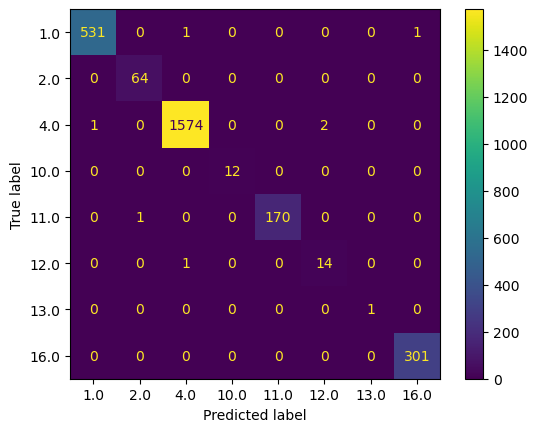

In [81]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(estimator=final_random_forest_classifier_model, X=transformed_X, y=y)

**linear_svc_clf**

In [83]:
confusion_matrix(y_test, y_preds_final_linear_svc_clf)
pd.crosstab(y_test, y_preds_final_linear_svc_clf, rownames=["Actual Label"],
            colnames=["predicted Labels"]
           )

predicted Labels,1.0,2.0,4.0,10.0,11.0,12.0,16.0
Actual Label,,,,,,,
1.0,114,0,1,0,0,0,1
2.0,0,10,0,0,0,0,0
4.0,1,0,313,0,0,2,0
10.0,0,0,0,2,0,0,0
11.0,0,1,0,0,32,0,0
12.0,0,0,0,0,0,1,0
16.0,0,0,0,0,0,0,57


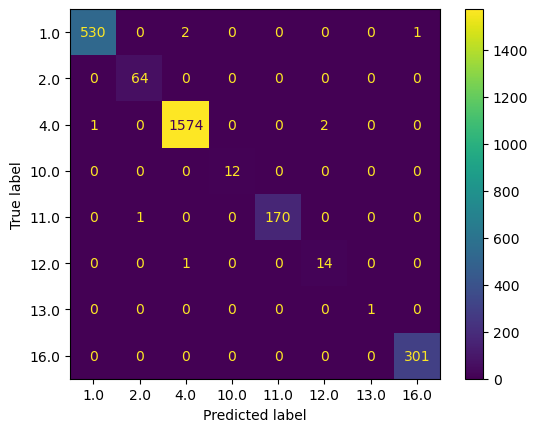

In [84]:
ConfusionMatrixDisplay.from_estimator(estimator=final_linear_svc_clf, X=transformed_X, y=y)

**knn_classifier**

In [85]:
confusion_matrix(y_test, y_preds_final_knn_classifier)
pd.crosstab(y_test, y_preds_final_knn_classifier, rownames=["Actual Label"],
            colnames=["predicted Labels"]
           )

predicted Labels,1.0,2.0,4.0,10.0,11.0,16.0
Actual Label,,,,,,
1.0,106,0,9,0,0,1
2.0,0,10,0,0,0,0
4.0,12,1,303,0,0,0
10.0,0,0,0,2,0,0
11.0,0,0,1,0,32,0
12.0,1,0,0,0,0,0
16.0,0,0,1,0,0,56


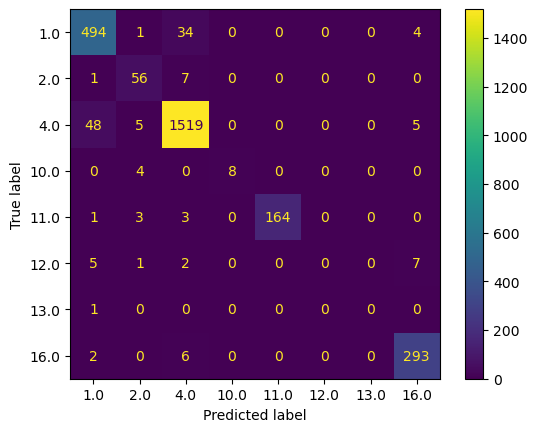

In [86]:
ConfusionMatrixDisplay.from_estimator(estimator=final_knn_classifier, X=transformed_X, y=y)

#### Model Ranking Based on Confusion Matrix


1. `final_random_forest_classifier_model`
2. `final_linear_svc_clf`
3. `final_knn_classifier`

#### 4.4 Classification Report


In [88]:
from sklearn.metrics import classification_report

**linear_svc_clf**

In [89]:
print(classification_report(y_test, y_preds_final_linear_svc_clf))

              precision    recall  f1-score   support

         1.0       0.99      0.98      0.99       116
         2.0       0.91      1.00      0.95        10
         4.0       1.00      0.99      0.99       316
        10.0       1.00      1.00      1.00         2
        11.0       1.00      0.97      0.98        33
        12.0       0.33      1.00      0.50         1
        16.0       0.98      1.00      0.99        57

    accuracy                           0.99       535
   macro avg       0.89      0.99      0.92       535
weighted avg       0.99      0.99      0.99       535



**knn_classifier**

In [90]:
print(classification_report(y_test, y_preds_final_knn_classifier))

              precision    recall  f1-score   support

         1.0       0.89      0.91      0.90       116
         2.0       0.91      1.00      0.95        10
         4.0       0.96      0.96      0.96       316
        10.0       1.00      1.00      1.00         2
        11.0       1.00      0.97      0.98        33
        12.0       0.00      0.00      0.00         1
        16.0       0.98      0.98      0.98        57

    accuracy                           0.95       535
   macro avg       0.82      0.83      0.83       535
weighted avg       0.95      0.95      0.95       535



**random_forest_classifier_model**

In [92]:
print(classification_report(y_test, y_preds_final_random_forest_classifier_model))

              precision    recall  f1-score   support

         1.0       0.99      0.98      0.99       116
         2.0       0.91      1.00      0.95        10
         4.0       1.00      0.99      0.99       316
        10.0       1.00      1.00      1.00         2
        11.0       1.00      0.97      0.98        33
        12.0       0.33      1.00      0.50         1
        16.0       0.98      1.00      0.99        57

    accuracy                           0.99       535
   macro avg       0.89      0.99      0.92       535
weighted avg       0.99      0.99      0.99       535



## 6. Save and load a trained model

**random_forest_classifier_model**

In [97]:
import pickle
pickle.dump(final_random_forest_classifier_model, open("./models/final_random_forest_classifier_model.pkl", "wb"))

**linear_svc_clf**

In [98]:
pickle.dump(final_linear_svc_clf, open("./models/final_linear_svc_clf_model.pkl", "wb"))

**knn_classifier**

In [99]:
pickle.dump(final_knn_classifier, open("./models/final_knn_classifier_model.pkl", "wb"))

# Conclusion

In the evaluation of our models, the random forest classifier demonstrated the highest performance, followed by the linear support vector classifier (LinearSVC) and k-nearest neighbors (KNN) classifier.
